In [1]:
# This cell is used for importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
import warnings
warnings.filterwarnings("ignore")

In [2]:
# We shall import the dataset which is nasa.csv file to implement our project
df = pd.read_csv("nasa.csv")
df.info()
column_values = df.iloc[:, 0].tolist()
print(column_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

Exploratory Data Analysis

In [3]:
# We are converting the values to numerical values
# +ve cases is 1 and -ve cases is 0
df['Hazardous'] = df['Hazardous'].astype('int64')

In [4]:
#We are dropping the columns which seem to be repititve in our case. Like the measurement sin miles and kms are redundant. Only one of the units
# is sufficient in our case
#Values like orbit determination date are not very much needed and can be discarded
df = df.drop(columns=['Close Approach Date','Orbit Determination Date','Neo Reference ID', 'Name', 'Orbiting Body', 'Orbit ID',
                      'Orbit Determination Date', 'Equinox',"Est Dia in KM(max)",'Est Dia in Feet(max)','Est Dia in M(min)',
                      'Est Dia in M(max)',"Est Dia in Miles(min)","Est Dia in Miles(max)","Est Dia in Feet(min)","Est Dia in Feet(min)",
                      'Relative Velocity km per hr',"Miles per hour","Miss Dist.(lunar)","Miss Dist.(kilometers)","Miss Dist.(miles)"])

Correlation Heatmap: Identifying Correlation

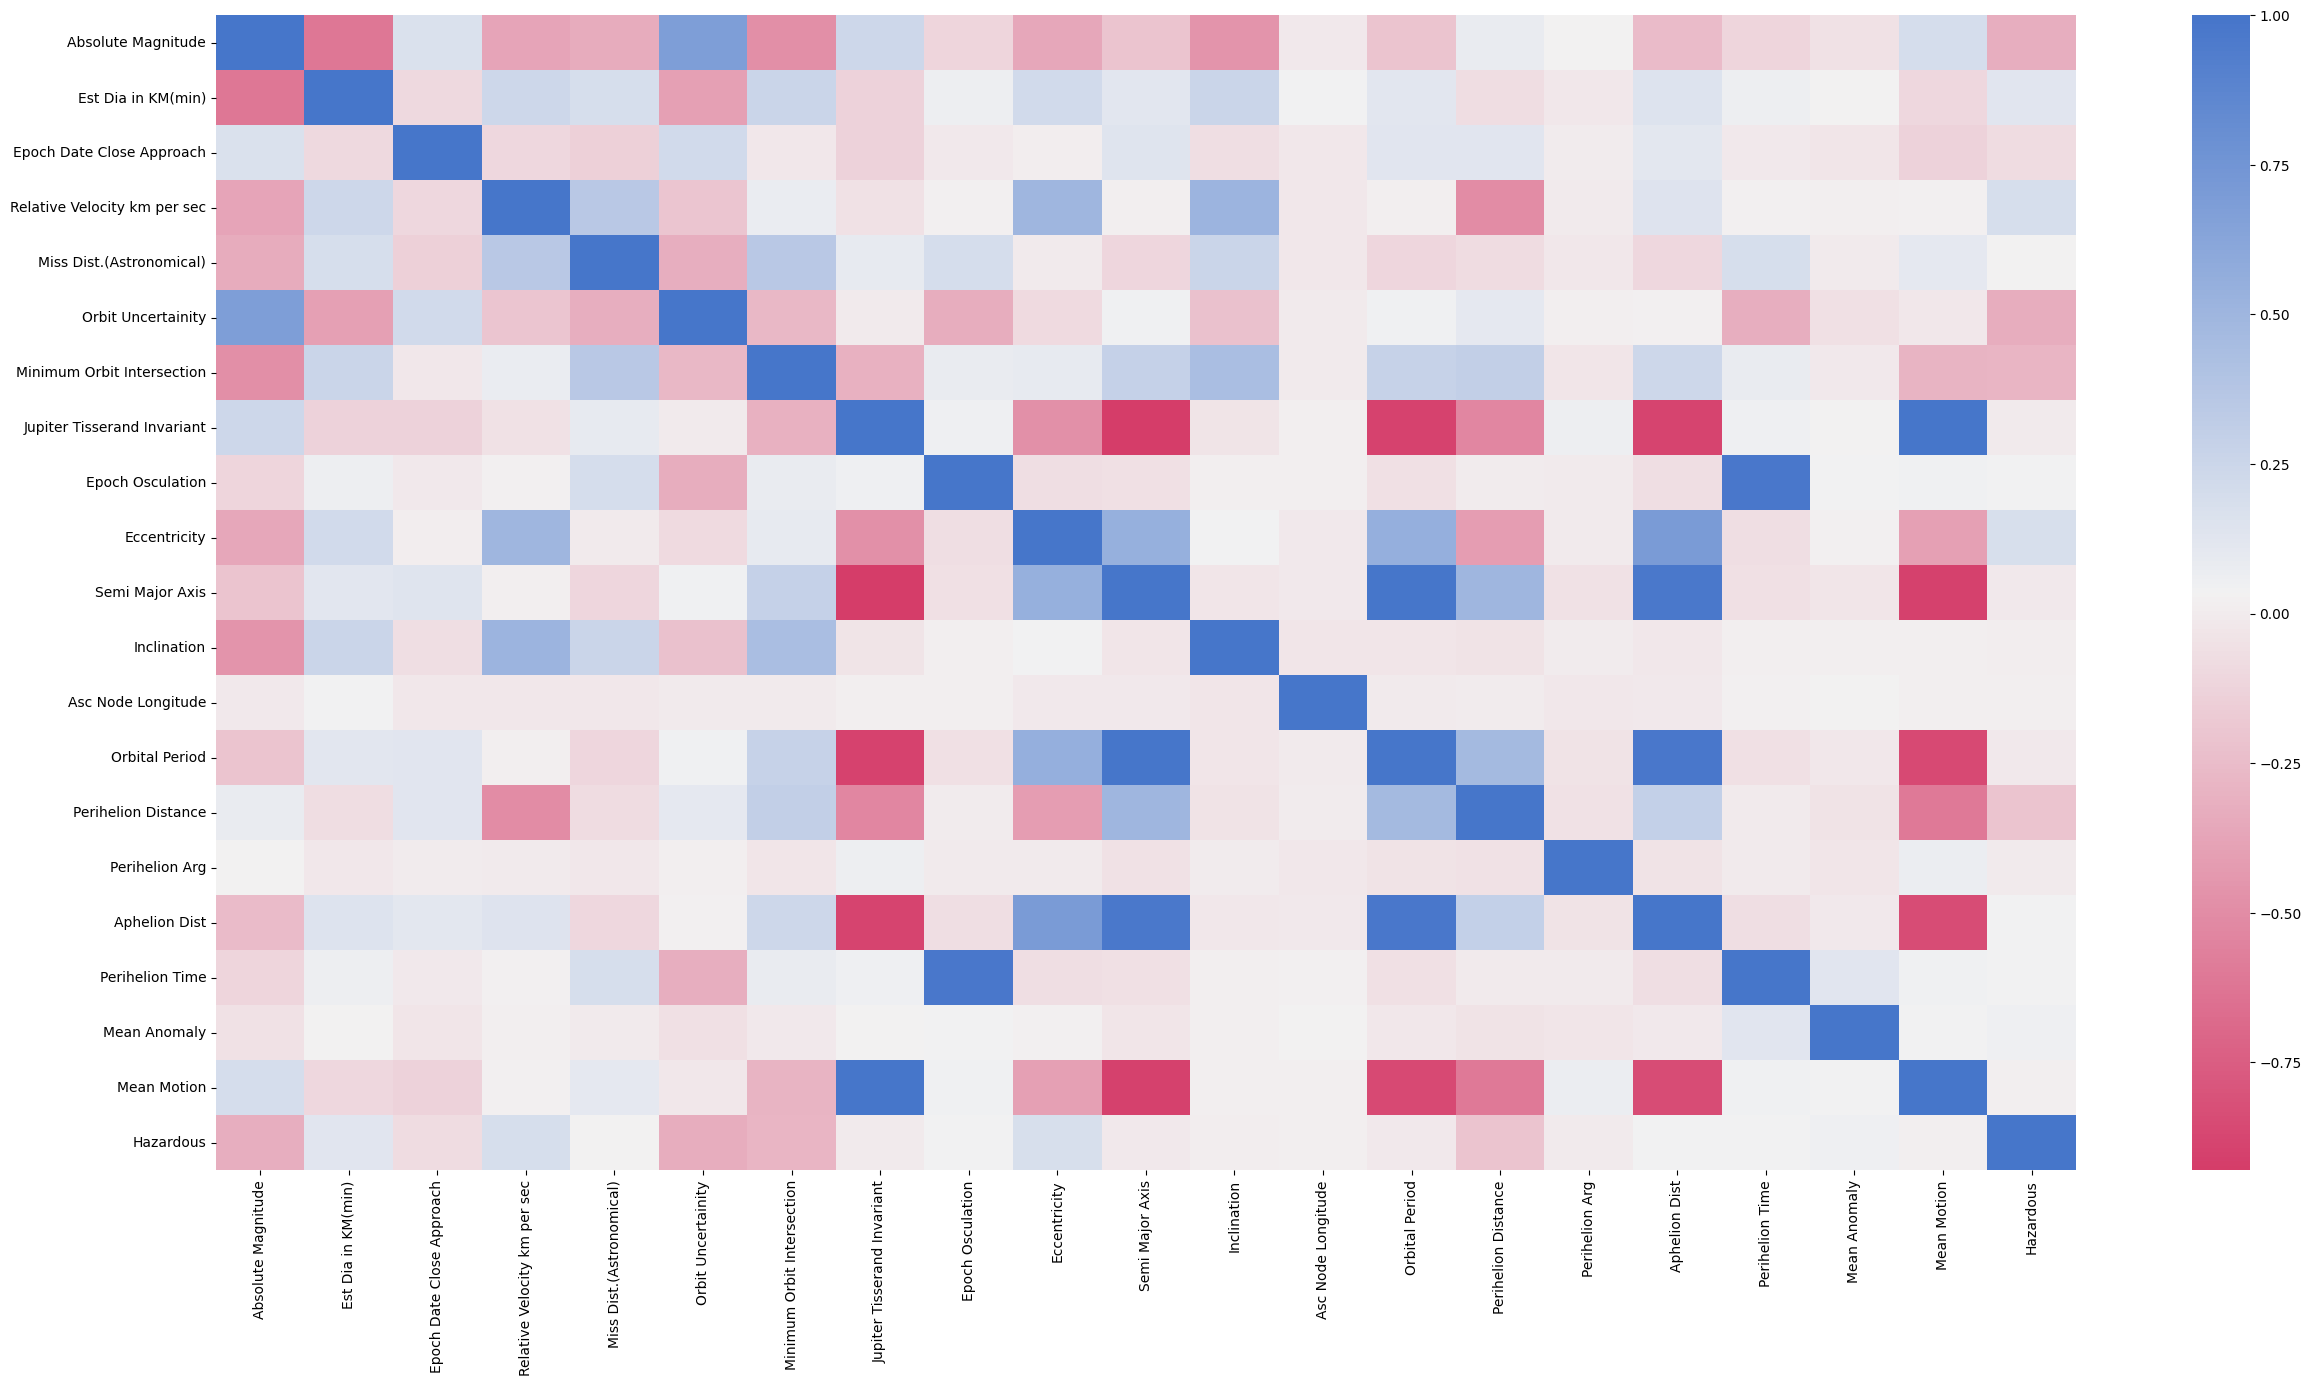

In [5]:
# In this section, a correlation heatmap is generated, displaying relationships among the remaining features.
# The heatmap employs a diverging colormap to highlight various correlations:

# Positive Correlation:

# Colors trending towards the lighter spectrum of the colormap (closer to 255) depict positive correlations.
# The brighter the color, the more pronounced the positive correlation.
# Negative Correlation:

# Colors gravitating towards the darker end of the colormap (closer to 0) signify negative correlations.
# The darker the color, the more robust the negative correlation.
# No Correlation (or Weak Correlation):

# Colors residing around the middle of the colormap may signify minimal to no correlation, with values approaching 128.
# The use of a diverging colormap is intentional to underscore both positive and negative correlations in the dataset.
# Positive correlations may manifest as shades of red, whereas negative correlations may manifest as shades of blue or green.
# The intensity of the color serves as an indicator of the correlation strength.


cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
feature_lst = list(df.columns)
correlations = df[feature_lst].corr()
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(correlations, cmap=cmap)
plt.show()

Box Plot: Detecting Outliers

In [6]:
#This is to take the feature columns.
X = df.drop('Hazardous',axis=1)    # Features

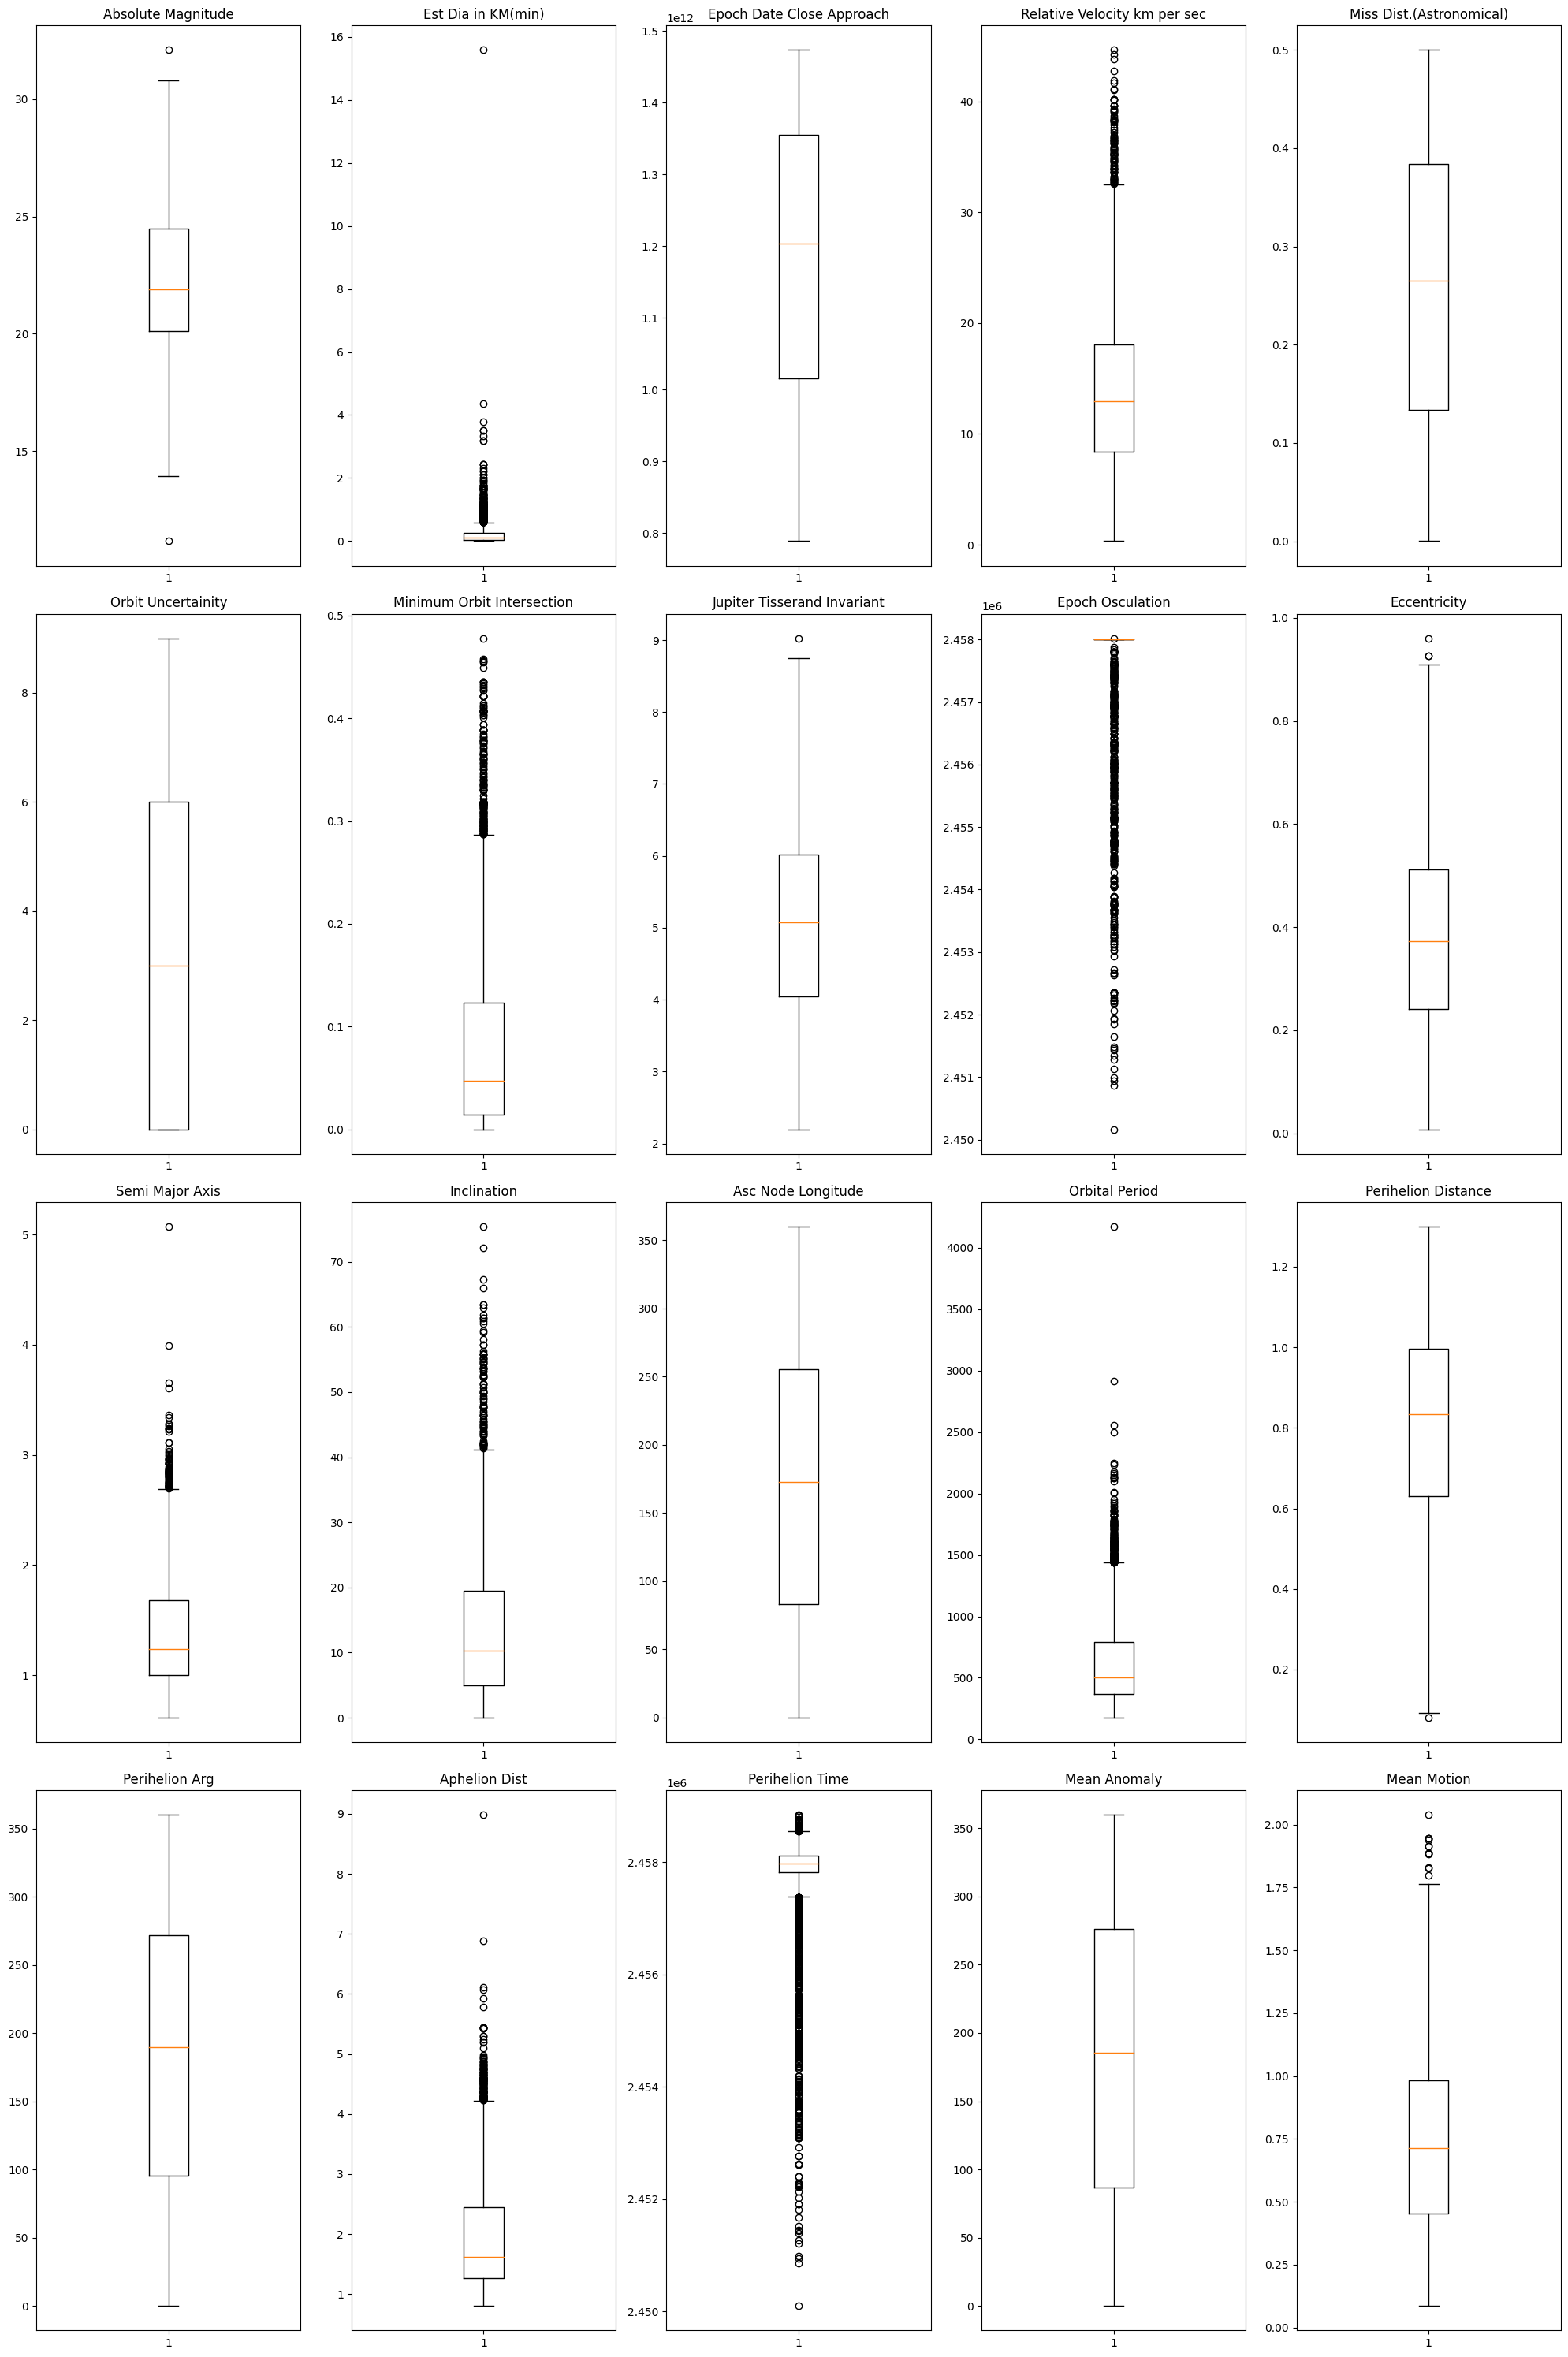

In [7]:
# # Detecting outlier in data using box plots

plt.figure(figsize=(20,30))

for i, variable in enumerate(X):
                     plt.subplot(4,5,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy import stats

# plt.figure(figsize=(20, 30))

# for i, variable in enumerate(X):
#     plt.subplot(4, 5, i + 1)

#     # Boxplot without outliers
#     sns.boxplot(x=df[variable], whis=1.5)

#     # Identify and highlight outliers using Z-score
#     z_scores = stats.zscore(df[variable])
#     threshold = 3
#     outliers = df[abs(z_scores) > threshold]

#     # Highlight outliers in red using a scatter plot
#     plt.scatter(outliers[variable], [0] * len(outliers), color='red', label='Outliers')

#     plt.title(variable)
#     plt.tight_layout()

# plt.show()

# Reasons for Addressing Outliers Across All Columns:

**Consistency Across Features:**
Ensuring uniform outlier treatment across all numerical features maintains a consistent approach throughout the dataset. Applying a specific threshold or method consistently promotes coherence.

**Global Data Quality:**
The presence of outliers in a single feature can impact model performance or interpretation. Addressing outliers across all features aims to enhance the overall quality and robustness of the dataset.

**Preventing Model Bias:**
Anomalies in one feature may disproportionately influence the model, leading to biased predictions. Treating outliers in all features helps minimize the risk of bias, ensuring that no individual feature unduly influences the model.

**Handling Multivariate Outliers:**
Certain outlier treatment methods account for relationships between features (multivariate outliers). Treating outliers across all columns increases the likelihood of addressing potential multivariate outliers.

**Avoiding Spurious Correlations:**
Outliers in a single feature could result in spurious correlations with other features. Addressing outliers across all features facilitates the capture of meaningful correlations, reducing the impact of correlations driven by extreme values.


In [8]:
# To treeat the outliers we are using flooring and capping method in this cell
def treat_outliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    return df

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df,c)
    return df


# treat_outliers(df, col): This function identifies and handles outliers in a DataFrame's specified column.
# It calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the column,
# defines lower and upper whiskers based on the IQR, and clips values outside the whiskers.
# The original column values are replaced with the clipped values, and the modified DataFrame is returned.

# treat_outliers_all(df, col_list): This function extends outlier treatment to a list of columns in a DataFrame.
# It iterates through each column in the provided list, applying the treat_outliers function to handle outliers.
# The resulting DataFrame, with treated outliers across all specified columns, is returned.


In [9]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
# print(numerical_col)
#  selects only the columns in the DataFrame df that contain numerical data.
del numerical_col[-1]
# The last column needs to be removed as it does not have any important significances in data that needs to processed
df = treat_outliers_all(df,numerical_col)

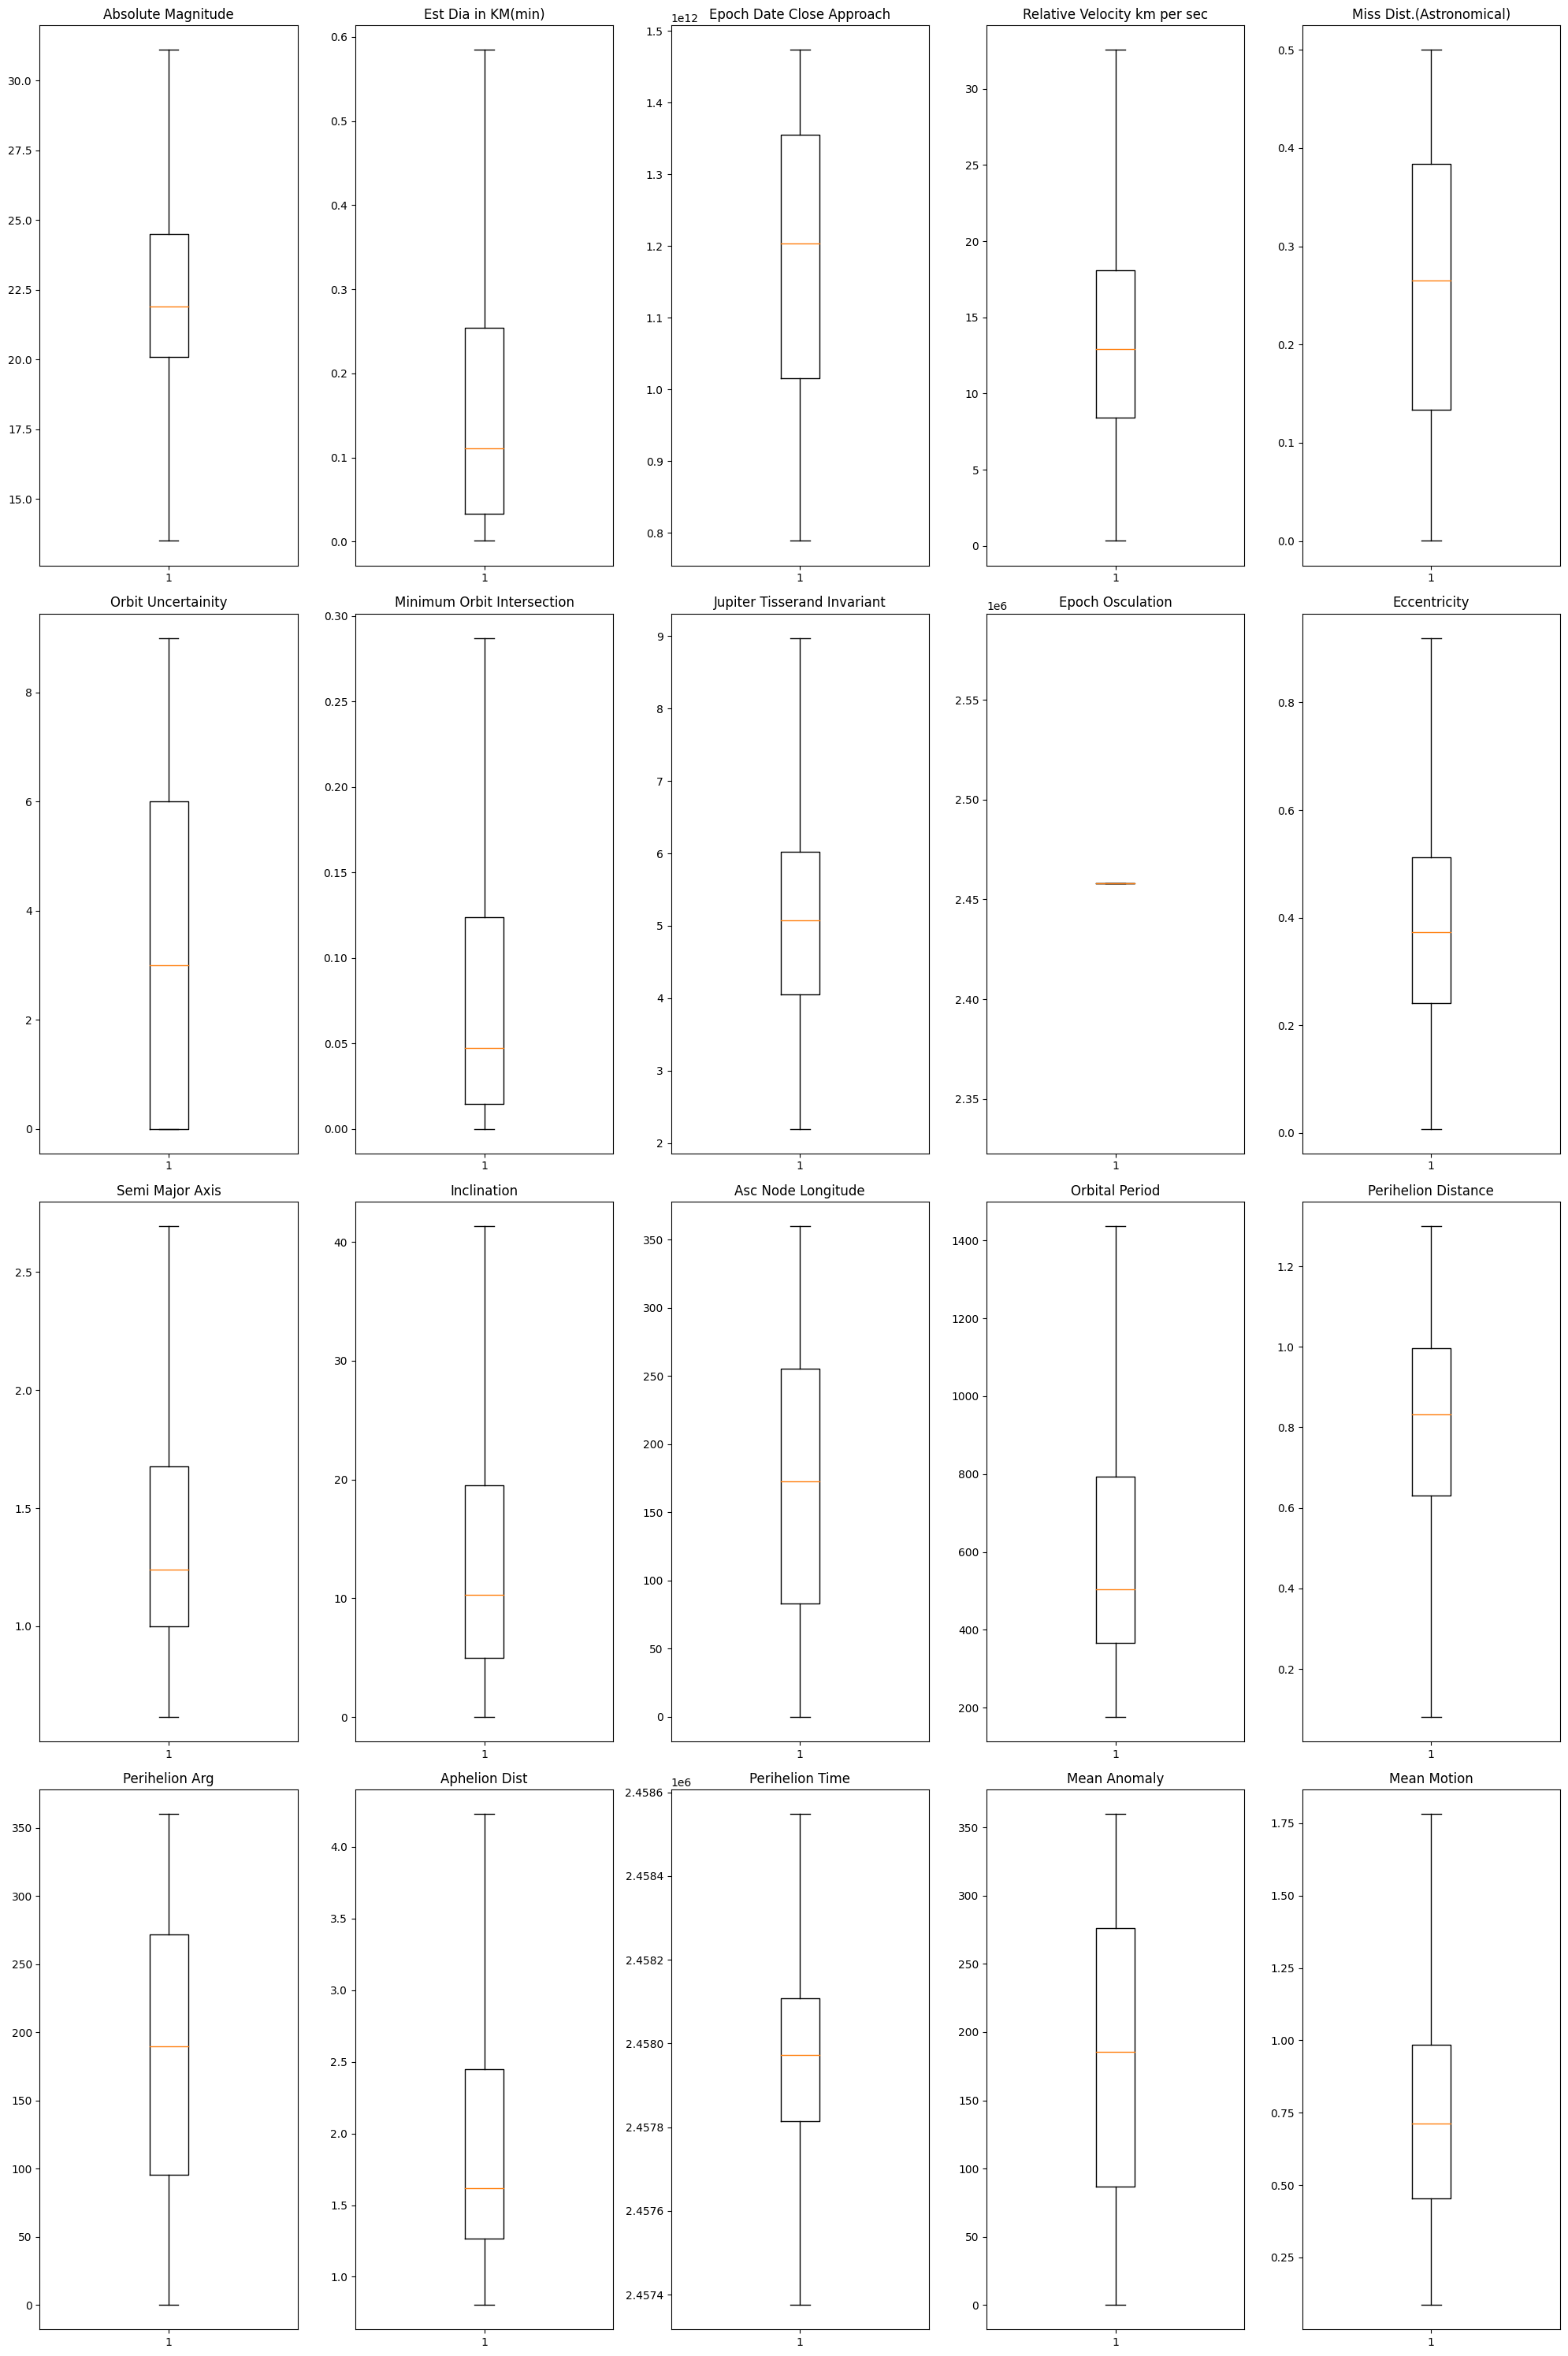

In [10]:
#We can see the box plot for the treated outliers for all the columns
X = df.drop('Hazardous',axis=1)

# Plot Box Plot
plt.figure(figsize=(20,30))

for i, variable in enumerate(X):
                     plt.subplot(4,5,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

Reducing Skewness: Log and Square Root Transformation

In [23]:
# Estimated Diameter
df["Log_ESTDIA"] = df["Est Dia in KM(min)"].map(lambda i: np.log(i) if i > 0 else 0)    # Log Transformation
print(df['Est Dia in KM(min)'].skew())
print(df['Log_ESTDIA'].skew())

df["Sqrt_ESTDIA"] = np.sqrt(df["Est Dia in KM(min)"])
print("Sqrt_ESTDIA",df['Sqrt_ESTDIA'].skew())

df["Cbrt_ESTDIA"] = np.cbrt(df["Est Dia in KM(min)"])
print("Cbrt_ESTDIA",df['Cbrt_ESTDIA'].skew())

1.163280088795182
-0.38831918367636453
Sqrt_ESTDIA 0.5077172947114252
Cbrt_ESTDIA 0.2398579452239246


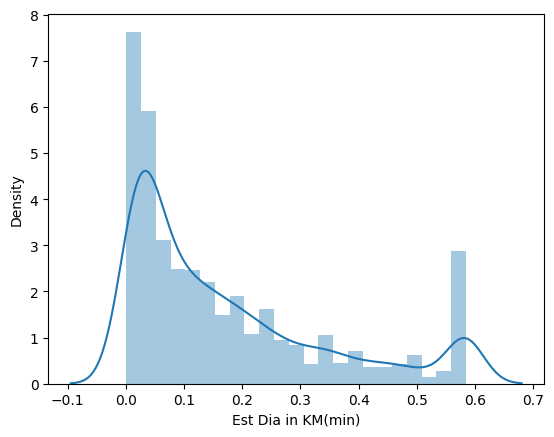

In [24]:
sns.distplot(df['Est Dia in KM(min)'])
plt.show()

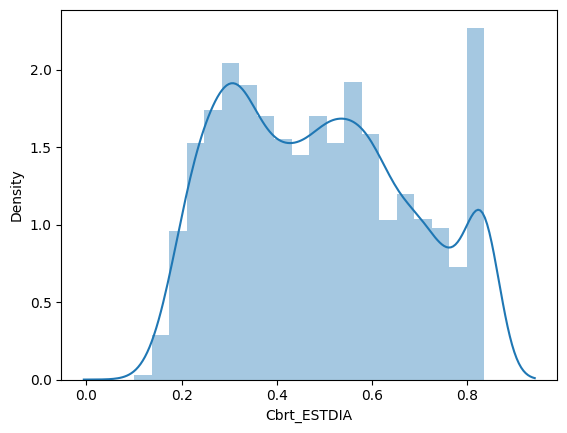

In [25]:
sns.distplot(df['Cbrt_ESTDIA'])
plt.show()

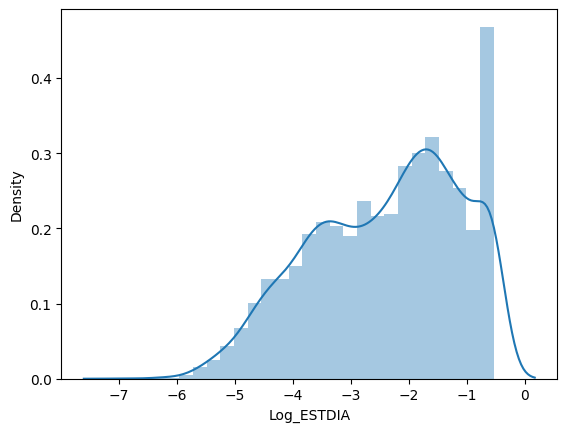

In [26]:
sns.distplot(df['Log_ESTDIA'])
plt.show()

In [27]:
df = df.drop(["Sqrt_ESTDIA"],axis=1)
df = df.drop(["Log_ESTDIA"],axis=1)

In [28]:
# Minimum Orbit Intersection
df["Log_Orbit"] = df["Minimum Orbit Intersection"].map(lambda i: np.log(i) if i > 0 else 0)    # Log Transformation
print(df['Minimum Orbit Intersection'].skew())
print(df['Log_Orbit'].skew())

1.1477309463959624
-1.114641485848336


In [29]:
# Delete Log Results
df = df.drop(["Log_Orbit"],axis=1)

In [31]:
# Minimum Orbit Intersection
df["sqrt_Orbit"] = df["Minimum Orbit Intersection"].map(lambda i: np.sqrt(i) if i > 0 else 0)    # Square Root Transformation
print(df['Minimum Orbit Intersection'].skew())
print(df['sqrt_Orbit'].skew())

1.1477309463959624
0.4289907326069241


Cbrt_Orbit 0.07839651415944082


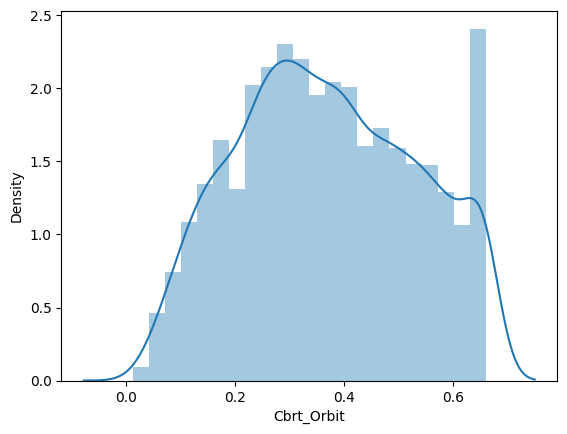

In [32]:
df["Cbrt_Orbit"] = np.cbrt(df["Minimum Orbit Intersection"])
print("Cbrt_Orbit",df['Cbrt_Orbit'].skew())
sns.distplot(df['Cbrt_Orbit'])
plt.show()

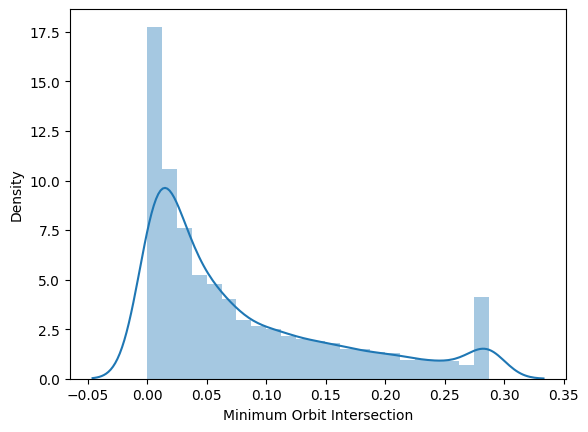

In [33]:
sns.distplot(df['Minimum Orbit Intersection'])
plt.show()

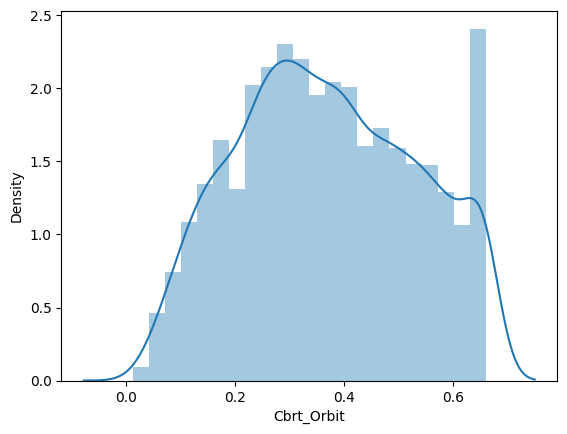

In [34]:
sns.distplot(df['Cbrt_Orbit'])
plt.show()

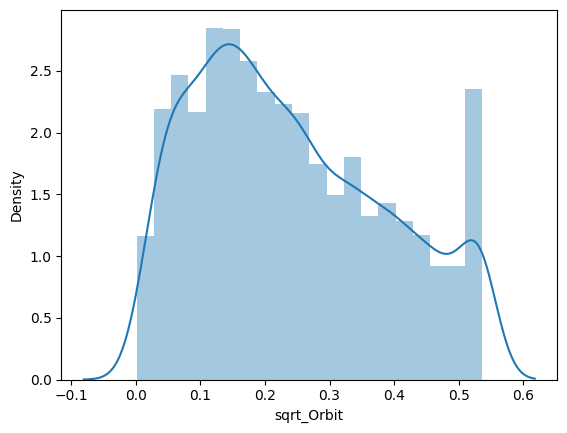

In [35]:
sns.distplot(df['sqrt_Orbit'])
plt.show()

In [36]:
df = df.drop(["Est Dia in KM(min)",'Minimum Orbit Intersection'],axis=1)

In [37]:
df = df.drop(["Cbrt_Orbit"],axis=1)

Class Imbalance

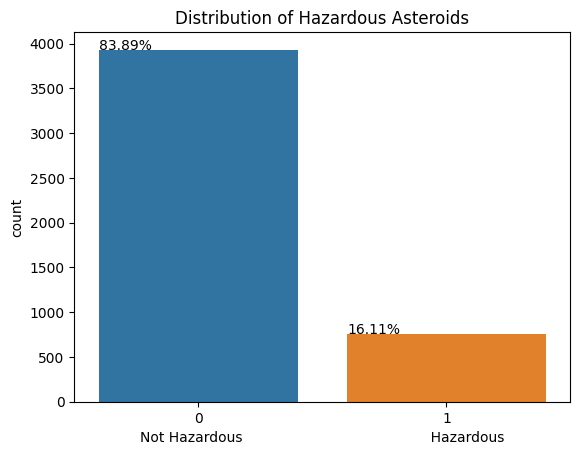

In [38]:
ax = sns.countplot(x = "Hazardous", data = df)
plt.title('Distribution of Hazardous Asteroids')
plt.xlabel('Not Hazardous                                           Hazardous')
total = len(df["Hazardous"])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x()
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))


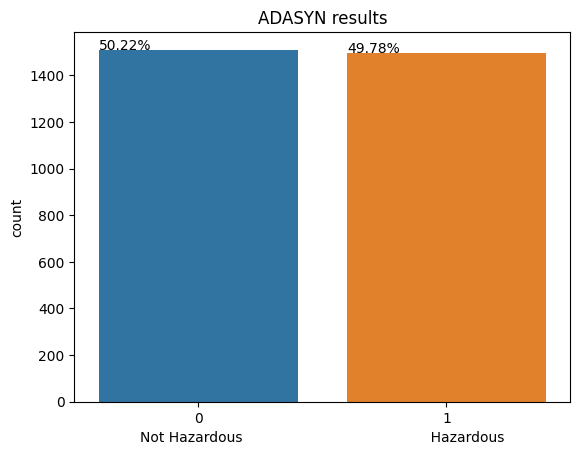

array([[2.10000000e+01, 9.94575600e+11, 1.04612054e+01, ...,
        1.13939014e+00, 5.51465472e-01, 3.13716273e-01],
       [2.37000000e+01, 1.20496320e+12, 6.77924225e+00, ...,
        2.82228713e-01, 3.64349624e-01, 3.96764414e-01],
       [3.08000000e+01, 1.18776600e+12, 3.18521652e+01, ...,
        4.41979260e-01, 1.22513794e-01, 1.09025685e-02],
       ...,
       [2.12365525e+01, 1.47076216e+12, 1.43224166e+01, ...,
        8.44859860e-01, 5.33581499e-01, 1.53265445e-01],
       [2.04497442e+01, 1.46984402e+12, 1.97586825e+01, ...,
        4.23069957e-01, 6.08583450e-01, 1.60892527e-01],
       [1.80478533e+01, 1.47264965e+12, 1.21160058e+01, ...,
        6.32381571e-01, 7.54876144e-01, 1.87225520e-01]])

In [39]:
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Undersample majority class
under = RandomUnderSampler(sampling_strategy=0.5)

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')

# Oversample minority class using ADASYN
adasyn = ADASYN(sampling_strategy='minority')

# Create an imbalanced pipeline with RandomUnderSampler, SimpleImputer, and ADASYN
pipeline = Pipeline(steps=[('u', under), ('i', imputer), ('a', adasyn)])

# Fit and transform the dataset
FEATURES = list(df.columns)
del FEATURES[-3]

# Assuming df is your original dataframe
X_ADASYN, y_ADASYN = pipeline.fit_resample(df.loc[:, FEATURES], df["Hazardous"])

# Plotting label distribution after ADASYN
ax = sns.countplot(x='Hazardous', data=pd.DataFrame(y_ADASYN))
plt.title('ADASYN results')
plt.xlabel('Not Hazardous                                           Hazardous')
total = len(y_ADASYN)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x_coord = p.get_x()
    y_coord = p.get_y() + p.get_height() + 0.02
    ax.annotate(percentage, (x_coord, y_coord))
plt.show()

# Display the resulting dataset
X_ADASYN


,Absolute Magnitude,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Cbrt_ESTDIA,sqrt_Orbit
0,22.8,932022000000,5.043151,0.352058,2,5.268,2458000.5,0.098626,1.203340,9.397169,226.107970,482.148461,1.084659,245.134423,1.322020,2.457879e+06,90.996584,0.746658,0.418329,0.375436
1,21.3,1427007600000,7.608794,0.293924,2,4.881,2458000.5,0.183995,1.327671,14.407899,330.175834,558.771655,1.083387,290.193320,1.571956,2.457758e+06,156.158812,0.644270,0.526645,0.400666
2,24.2,1193036400000,3.814998,0.189377,6,5.937,2458000.5,0.128313,1.028347,5.903974,307.447258,380.897322,0.896397,288.807360,1.160297,2.458048e+06,315.378981,0.945137,0.337431,0.165555
3,19.1,1436943600000,18.151514,0.396829,0,4.215,2458000.5,0.342492,1.611800,19.424921,128.660422,747.420514,1.059771,206.841081,2.163828,2.457987e+06,6.361150,0.481657,0.738219,0.266724
4,19.3,980150400000,18.046329,0.451273,2,4.091,2458000.5,0.264005,1.615508,35.937580,291.302445,750.001738,1.189007,265.501178,2.042010,2.458034e+06,344.103104,0.479999,0.715899,0.535823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,19.3,1470639600000,23.065959,0.058309,1,3.921,2458000.5,0.574790,1.647586,34.116306,138.565536,772.450559,0.700571,100.270236,2.594602,2.458331e+06,205.762131,0.466049,0.715899,0.096704
2009,21.5,1470639600000,14.754489,0.120808,2,5.786,2458000.5,0.095001,1.037464,29.922212,136.762870,385.973723,0.938903,39.290250,1.136024,2.457848e+06,142.264753,0.932706,0.510723,0.163168
2010,20.2,1471244400000,12.622398,0.189567,0,4.304,2458000.5,0.376807,1.573764,11.682160,169.500723,721.120395,0.980758,196.948416,2.166770,2.457645e+06,177.326778,0.499223,0.623522,0.114303
2011,21.6,1471244400000,17.154758,0.390278,1,4.478,2458000.5,0.562406,1.439534,7.159010,54.443592,630.857755,0.629932,256.055109,2.249136,2.458240e+06,223.131665,0.570652,0.502942,0.166518


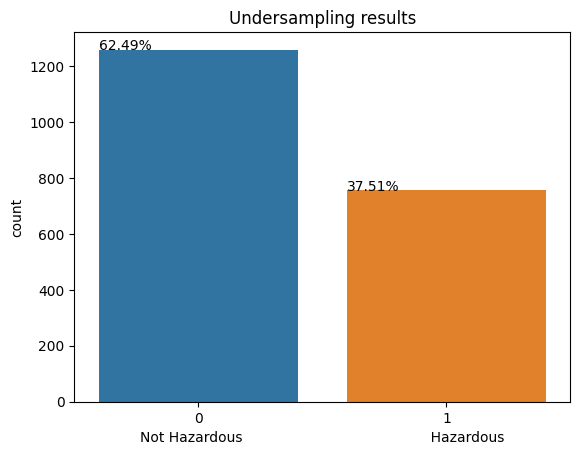

In [40]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy import where

under = RandomUnderSampler(sampling_strategy=0.6)

# transform the dataset
FEATURES = list(df.columns)
del FEATURES[-3]

X_SMOTE, y_SMOTE = under.fit_resample(df.loc[:, FEATURES], df["Hazardous"])

# plotting label distribution after undersampling
ax = sns.countplot(x='Hazardous', data=pd.DataFrame(y_SMOTE))
plt.title('Undersampling results')
plt.xlabel('Not Hazardous                                           Hazardous')
total = len(y_SMOTE)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x_coord = p.get_x()
    y_coord = p.get_y() + p.get_height() + 0.02
    ax.annotate(percentage, (x_coord, y_coord))

X_SMOTE

Implementing Machine Learning Models
  

In [41]:
from sklearn.model_selection import train_test_slit
import scipy.stats as statsp
from scipy.stats import stats, norm, skew
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
# Libraries for different classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Libraries for model tuning and evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [42]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision AND F1
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    # Recall = minimizes false negatives

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # Precision = minimizes false positives

    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1, test_f1))

    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))

    return score_list # returns the list with train and test scores

In [43]:
# Function to make confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import eig

X_train, X_test, y_train, y_test =train_test_split(X_SMOTE, y_SMOTE, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)
scaler = MinMaxScaler()
normalized_x_train = scaler.fit_transform(X_train)
normalized_x_test = scaler.transform(X_test)
cov_normalized_x_train = np.cov(normalized_x_train, rowvar=False)
print(cov_normalized_x_train.shape)
print(cov_normalized_x_train[0:, 0:])
eigenvalues, eigenvectors = eig(cov_normalized_x_train)
print(cov_normalized_x_train.size)
print(eigenvalues[:])
print(eigenvalues.size)

Decision Tree

In [88]:
from sklearn.metrics import accuracy_score
d_tree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9950372208436724
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.9874213836477987
F1-Score on training set :  1.0
F1-Score on test set :  0.9936708860759493


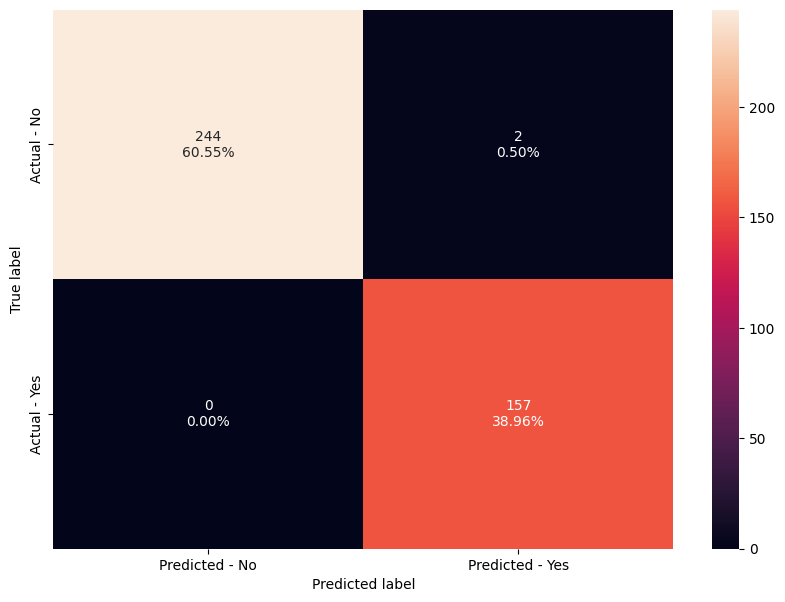

In [89]:
# Calculate metrics
get_metrics_score(d_tree)

# Create the confusion matrix
make_confusion_matrix(d_tree,y_test)

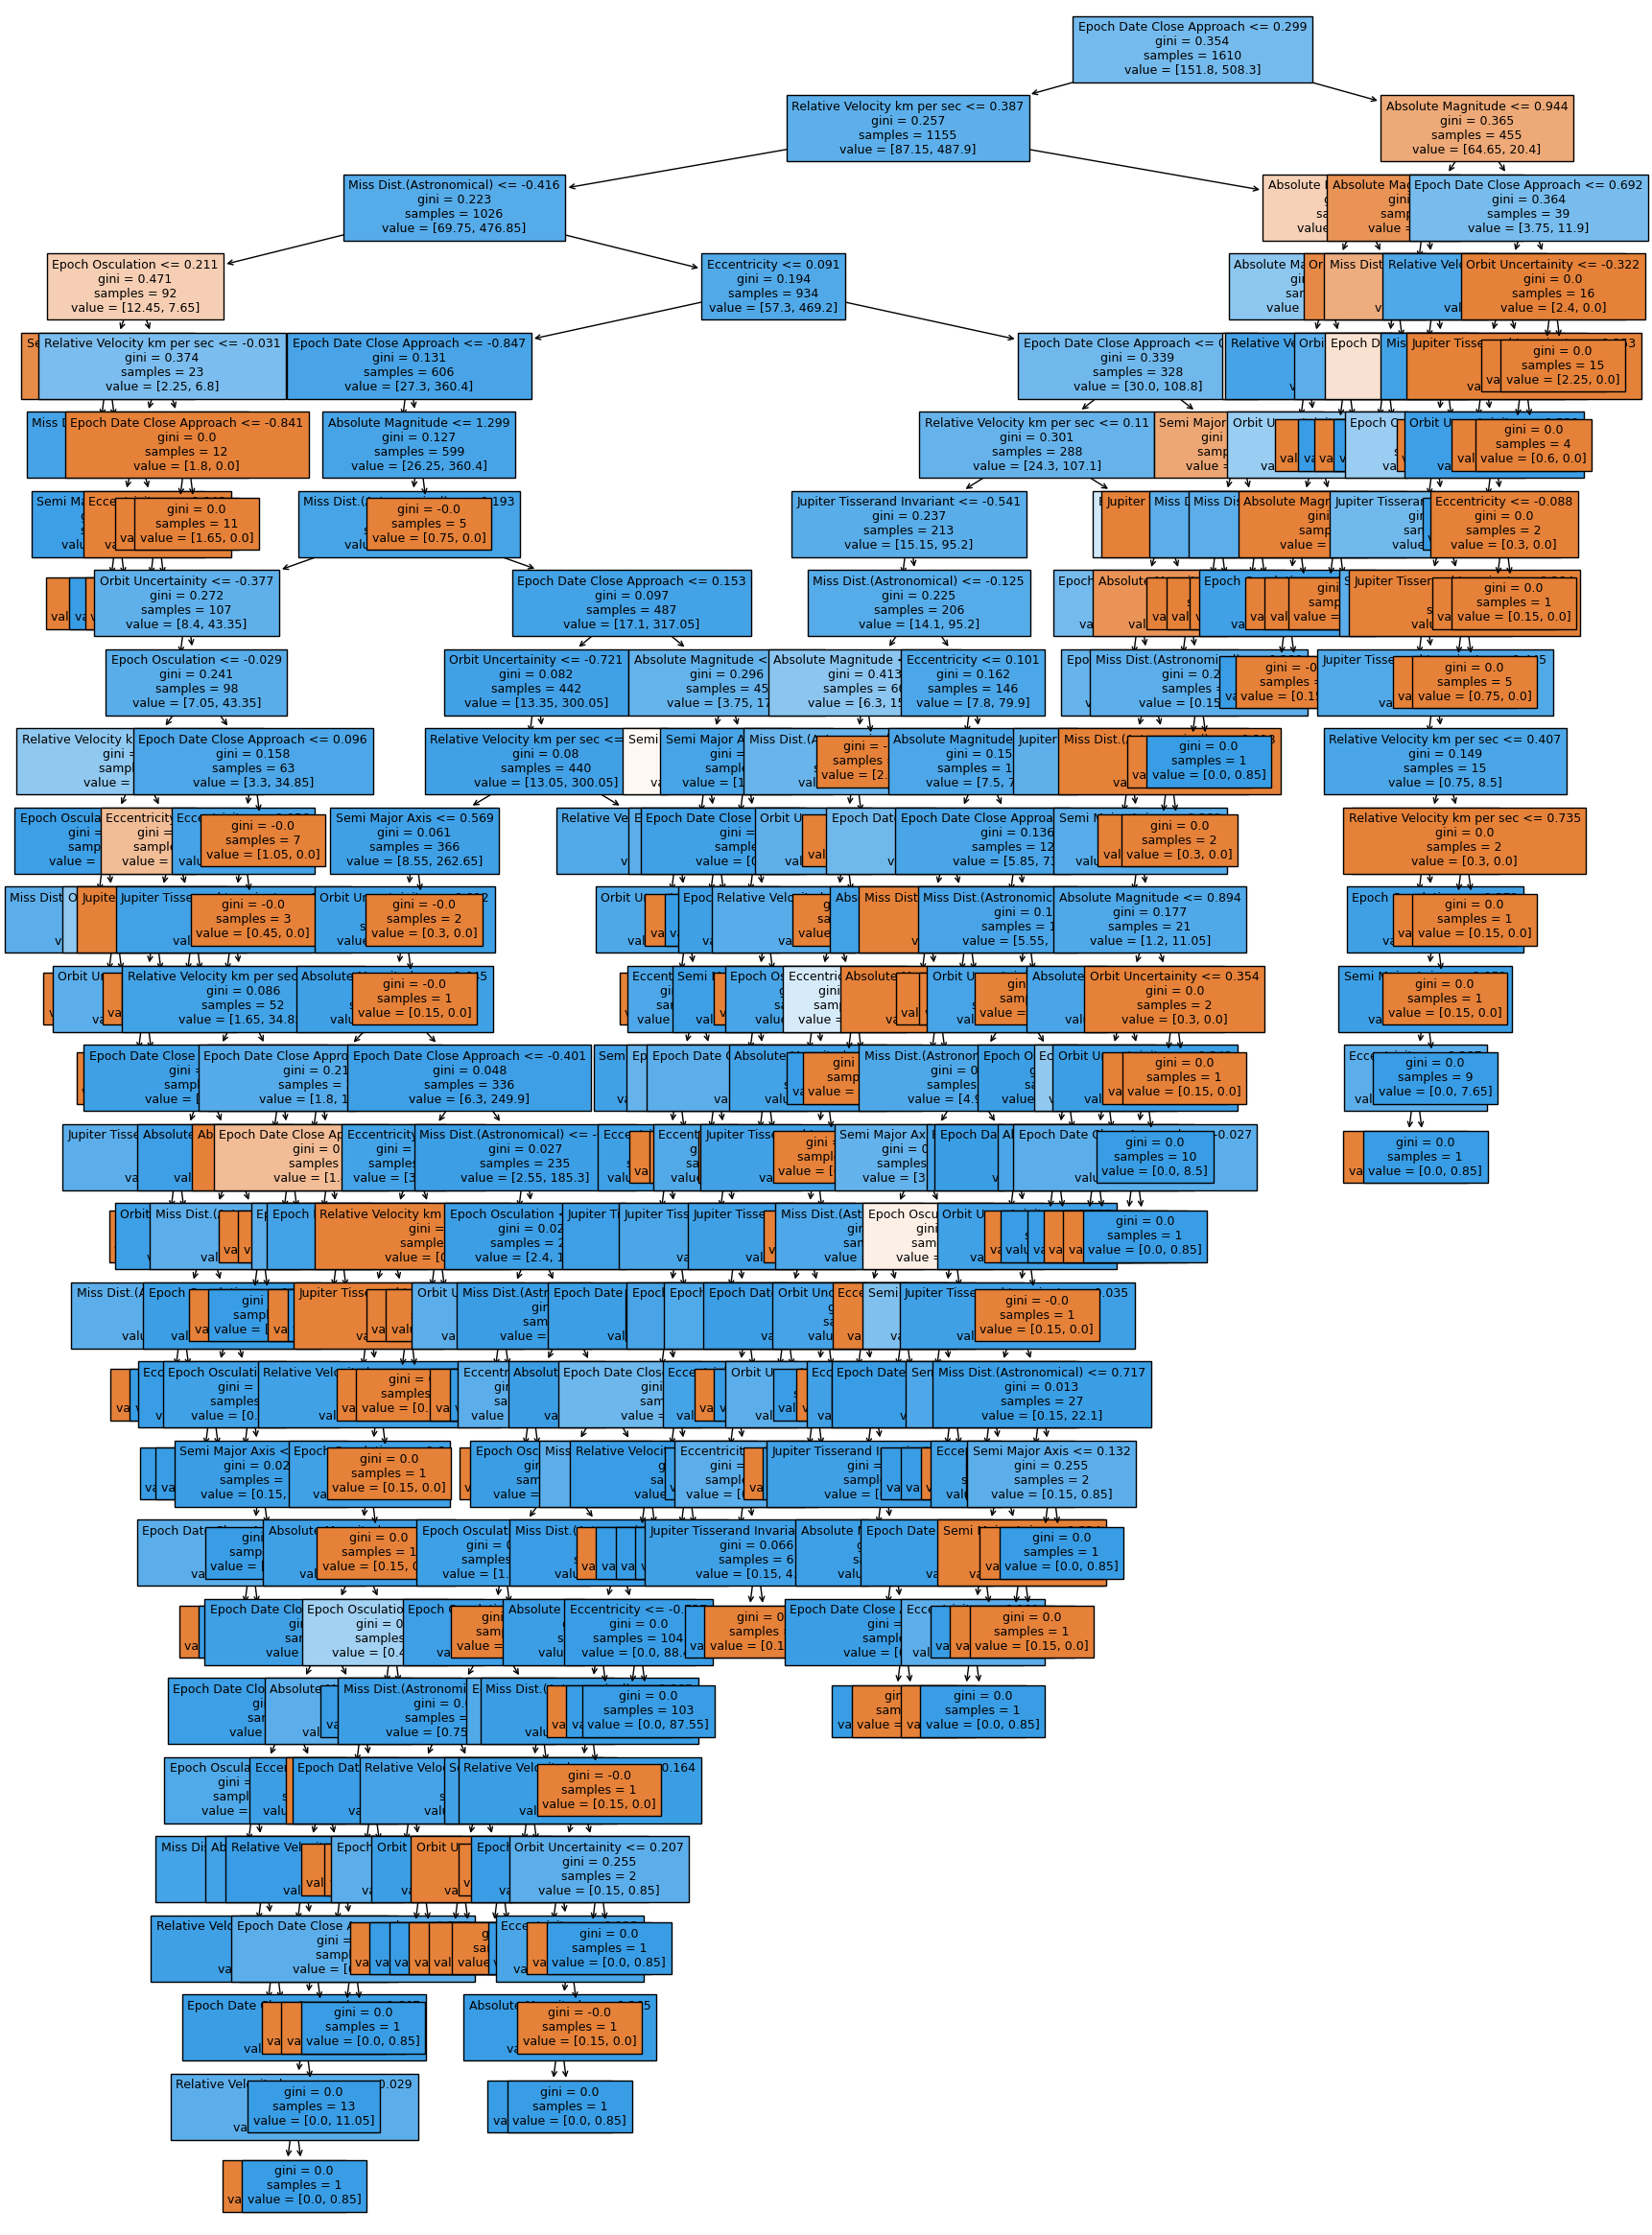

In [87]:
# Visualize Tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

plt.figure(figsize=(20,30))
out = tree.plot_tree(d_tree,feature_names=FEATURES,filled=True,fontsize=9,node_ids=False,class_names=None,)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [48]:
print(tree.export_text(d_tree,feature_names=FEATURES,show_weights=True))

|--- sqrt_Orbit <= 0.22
|   |--- Cbrt_ESTDIA <= 0.46
|   |   |--- Perihelion Distance <= 0.44
|   |   |   |--- Epoch Date Close Approach <= 865150205952.00
|   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |--- Epoch Date Close Approach >  865150205952.00
|   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |--- Perihelion Distance >  0.44
|   |   |   |--- weights: [61.20, 0.00] class: 0
|   |--- Cbrt_ESTDIA >  0.46
|   |   |--- Absolute Magnitude <= 22.05
|   |   |   |--- sqrt_Orbit <= 0.22
|   |   |   |   |--- weights: [0.00, 498.10] class: 1
|   |   |   |--- sqrt_Orbit >  0.22
|   |   |   |   |--- Miss Dist.(Astronomical) <= 0.43
|   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |--- Miss Dist.(Astronomical) >  0.43
|   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |--- Absolute Magnitude >  22.05
|   |   |   |--- Orbit Uncertainity <= 2.50
|   |   |   |   |--- Perihelion Time <= 2457915.62
|   |   |   |   |   |--- weights: [0

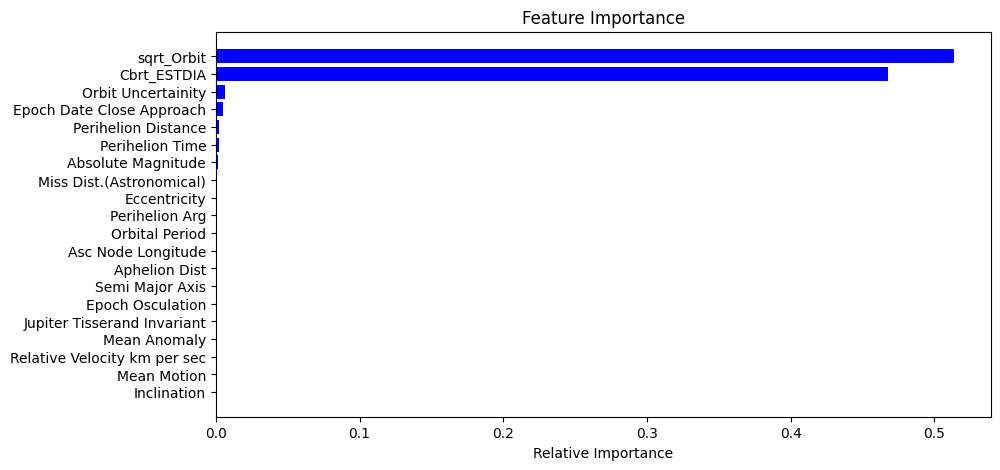

In [49]:
# Feature Importance
importances = d_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Random Forest

Accuracy on training set :  1.0
Accuracy on test set :  0.9975186104218362
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.9936708860759493
F1-Score on training set :  1.0
F1-Score on test set :  0.9968253968253968


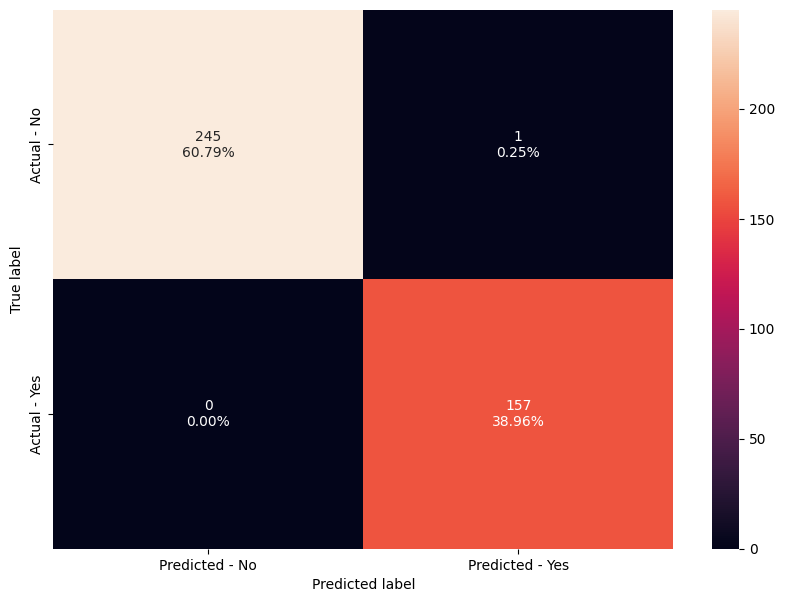

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

get_metrics_score(rf_estimator)

make_confusion_matrix(rf_estimator,y_test)

Bagging Classifier

Accuracy on training set :  0.9993788819875776
Accuracy on test set :  0.9975186104218362
Recall on training set :  0.9983277591973244
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.9936708860759493
F1-Score on training set :  0.9991631799163181
F1-Score on test set :  0.9968253968253968


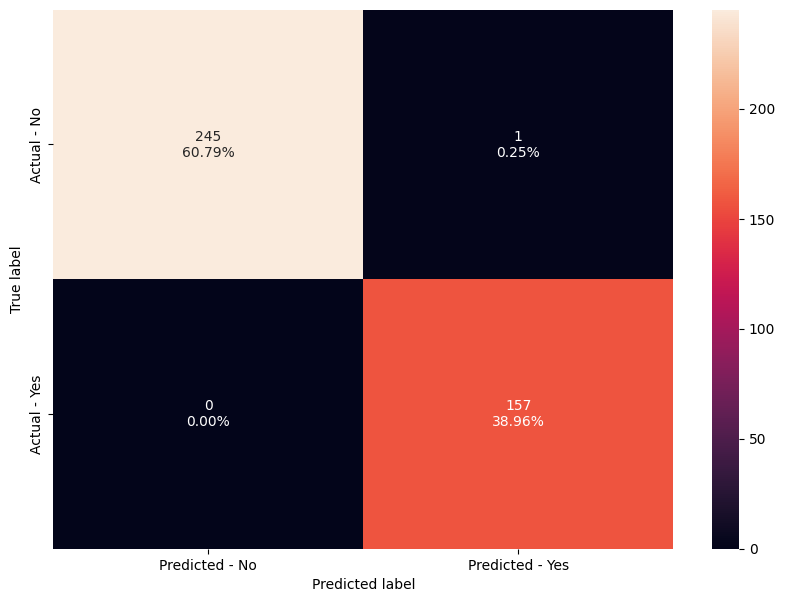

In [51]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(bagging_classifier)

# Create the confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

Tuned Decision Tree: Random Search

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# Decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid to search over
param_dist = {
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": np.arange(2, 11),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["gini", "entropy"],
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    dt_classifier, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1
)

# Fit the data to perform the randomized search
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 20, 30],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [53]:
# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the tuned decision tree model
tuned_dt_classifier = DecisionTreeClassifier(**best_params)

# Train the tuned model on the training data
tuned_dt_classifier.fit(X_train, y_train)

Best Parameters: {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 20, 'criterion': 'gini'}


DecisionTreeClassifier(max_depth=20, min_samples_leaf=3, min_samples_split=4)

Accuracy on training set :  0.9975155279503105
Accuracy on test set :  0.9975186104218362
Recall on training set :  0.9949832775919732
Recall on test set :  1.0
Precision on training set :  0.9983221476510067
Precision on test set :  0.9936708860759493
F1-Score on training set :  0.9966499162479062
F1-Score on test set :  0.9968253968253968


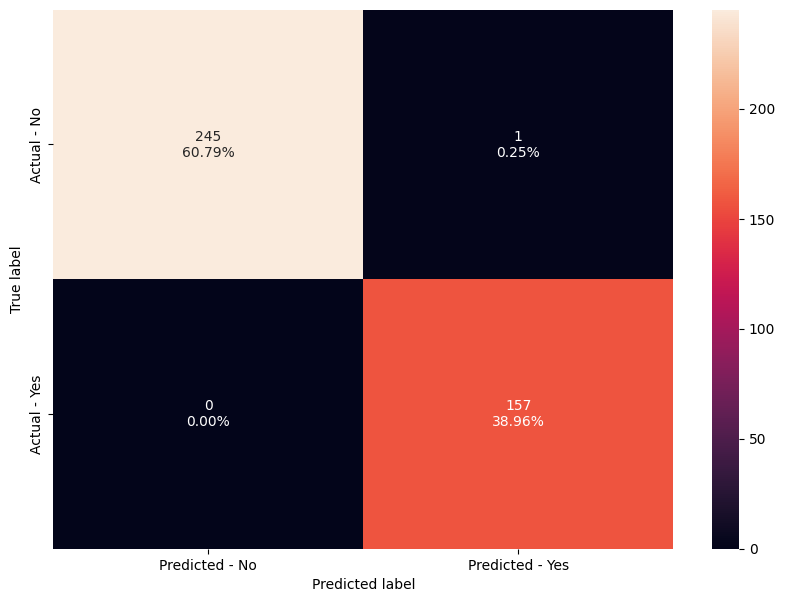

In [54]:


get_metrics_score(tuned_dt_classifier)

make_confusion_matrix(tuned_dt_classifier,y_test)

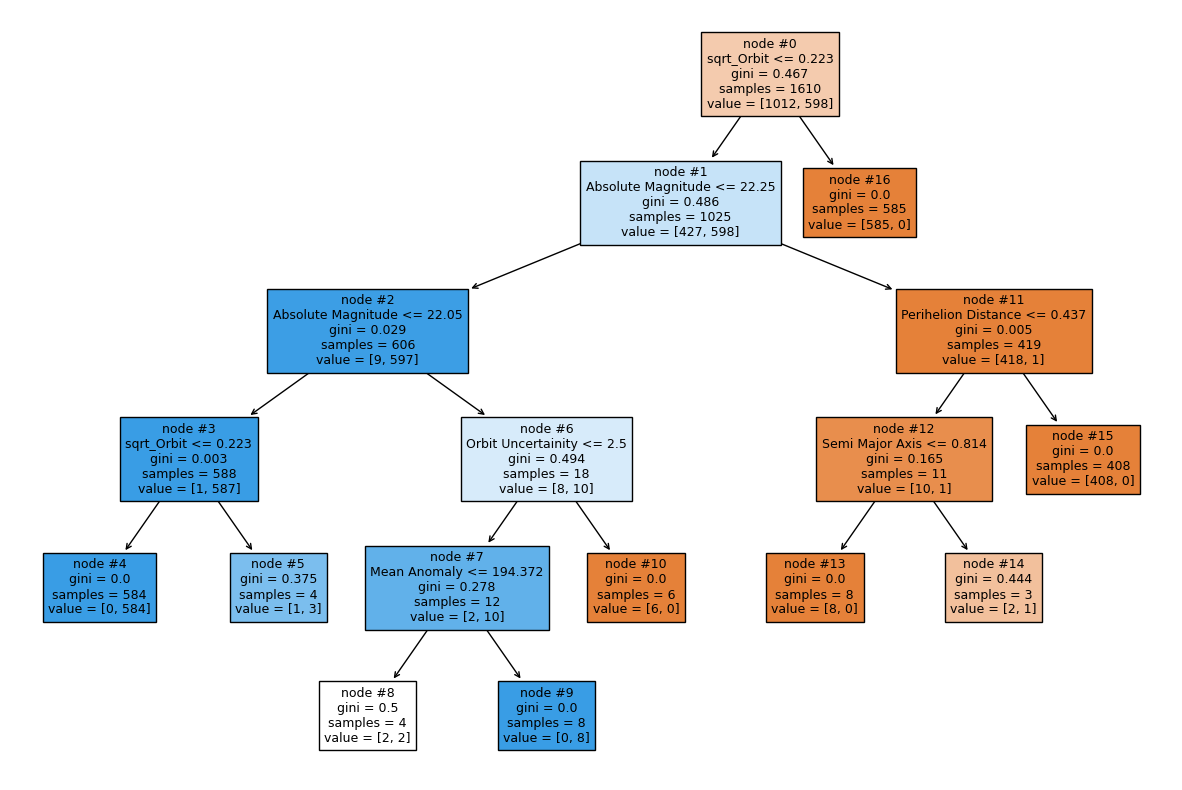

In [55]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(tuned_dt_classifier,feature_names=FEATURES,filled=True,fontsize=9,node_ids=True,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

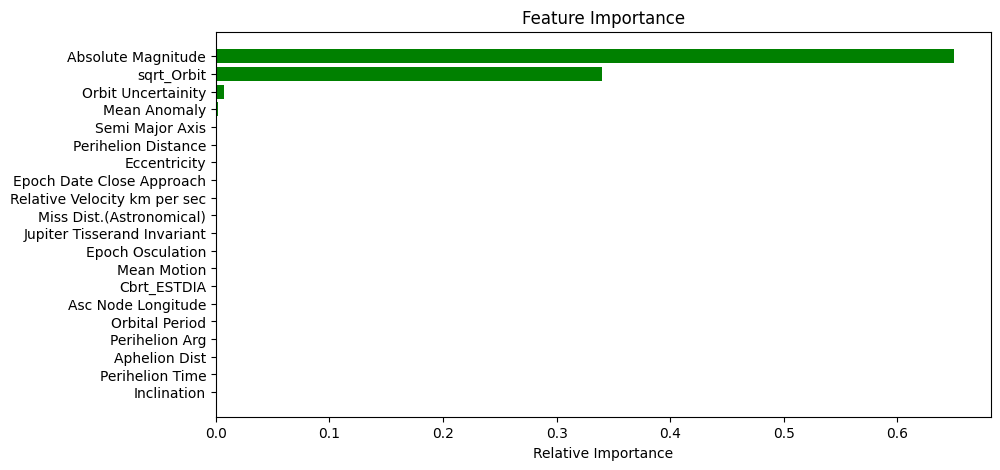

In [56]:
importances = tuned_dt_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

ADABOOST

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can customize base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

Accuracy on training set :  1.0
Accuracy on test set :  0.9925558312655087
Recall on training set :  1.0
Recall on test set :  0.9936305732484076
Precision on training set :  1.0
Precision on test set :  0.9873417721518988
F1-Score on training set :  1.0
F1-Score on test set :  0.9904761904761905


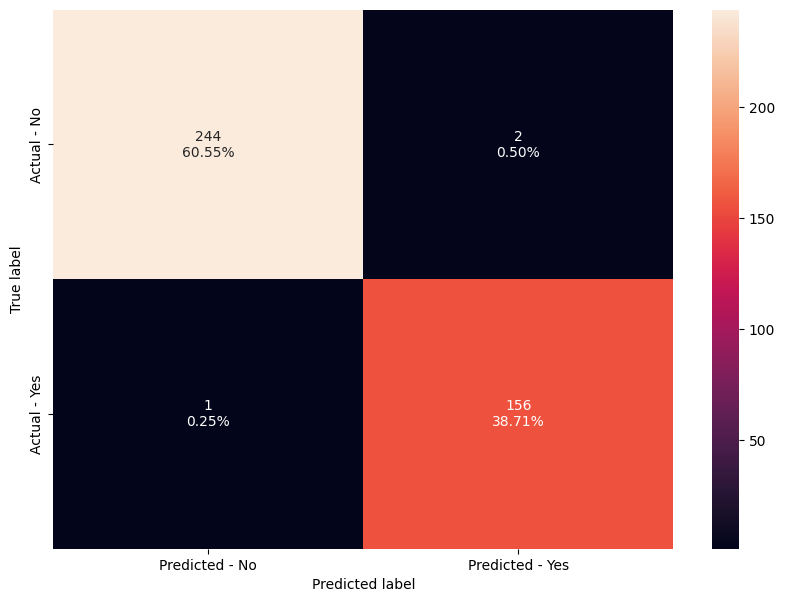

In [58]:
get_metrics_score(adaboost_classifier)
make_confusion_matrix(adaboost_classifier,y_test)

In [59]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.2 MB/s eta 0:00:00


Tuned Bagging Classifier: Bayes Optimization

In [60]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Base decision tree estimator
base_estimator = DecisionTreeClassifier()

# Bagging classifier
bagging_classifier = BaggingClassifier(estimator=base_estimator)

# Define the hyperparameter search space
param_space = {
    "n_estimators": Integer(50, 200),
    "max_samples": Real(0.1, 1.0),
    "max_features": Real(0.1, 1.0),
}

# Create the BayesSearchCV object
bayes_search = BayesSearchCV(
    bagging_classifier,
    search_spaces=param_space,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    random_state=42,
)

# Fit the data to perform Bayesian Optimization
bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
              n_iter=10, n_jobs=-1, random_state=42,
              search_spaces={'max_features': Real(low=0.1, high=1.0, prior='uniform', transform='normalize'),
                             'max_samples': Real(low=0.1, high=1.0, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=200, prior='uniform', transform='normalize')})

In [61]:
best_params = bayes_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the tuned BaggingClassifier
tuned_bagging_classifier = BaggingClassifier(
    base_estimator=base_estimator,
    n_estimators=best_params["n_estimators"],
    max_samples=best_params["max_samples"],
    max_features=best_params["max_features"],
)

# Train the tuned model on the training data
tuned_bagging_classifier.fit(X_train, y_train)

Best Parameters: OrderedDict([('max_features', 0.5003492610710367), ('max_samples', 0.9268502695024393), ('n_estimators', 66)])


BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                  max_features=0.5003492610710367,
                  max_samples=0.9268502695024393, n_estimators=66)

Accuracy on training set :  1.0
Accuracy on test set :  0.9975186104218362
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.9936708860759493
F1-Score on training set :  1.0
F1-Score on test set :  0.9968253968253968


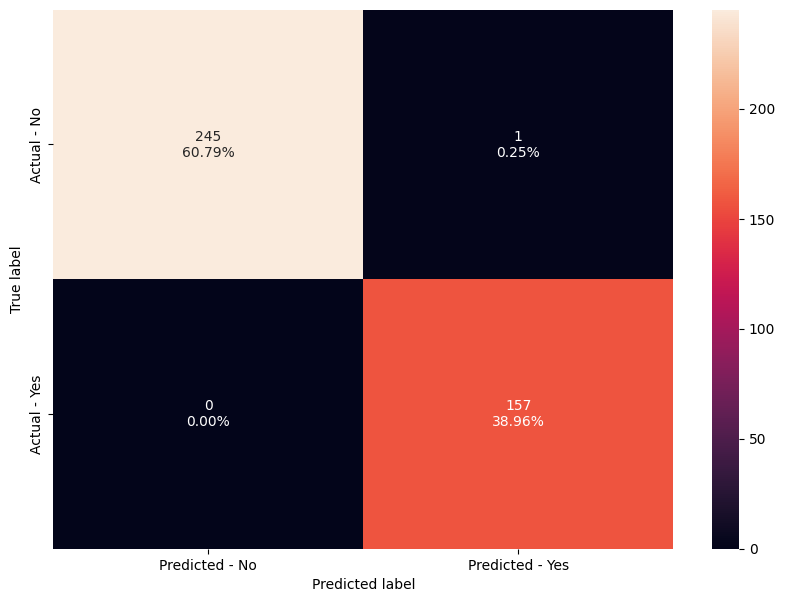

In [62]:
get_metrics_score(tuned_bagging_classifier)

make_confusion_matrix(tuned_bagging_classifier,y_test)

Comparing Models

In [63]:
# Identify the models to compare
bagging_classifier.fit(X_train,y_train)
models = [d_tree, rf_estimator, bagging_classifier, adaboost_classifier, tuned_dt_classifier, tuned_bagging_classifier]

# Define empty lists to add results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# Loop through all identified models to get the metrics score (i.e., Accuracy, Recall, Precision, and F1)
for model in models:

    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [64]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Random Forest','Bagging Classifier','Tuned Decision Tree','Tuned Random Forest',
                                          'Tuned Bagging Classifier'], 'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test, 'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'F1_Train':f1_train, 'F1_Test':f1_test})

#Sort models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,F1_Train,F1_Test
0,Decision Tree,1.000000,0.995037,1.000000,1.000000,1.000000,0.987421,1.00000,0.993671
1,Random Forest,1.000000,0.997519,1.000000,1.000000,1.000000,0.993671,1.00000,0.996825
2,Bagging Classifier,1.000000,0.995037,1.000000,1.000000,1.000000,0.987421,1.00000,0.993671
4,Tuned Random Forest,0.997516,0.997519,0.994983,1.000000,0.998322,0.993671,0.99665,0.996825
5,Tuned Bagging Classifier,1.000000,0.997519,1.000000,1.000000,1.000000,0.993671,1.00000,0.996825
3,Tuned Decision Tree,1.000000,0.992556,1.000000,0.993631,1.000000,0.987342,1.00000,0.990476


Testing the Model: Bagging Classifier

In [65]:
df2 = pd.read_csv("nasa.csv")

In [66]:
df2['Hazardous'] = df2['Hazardous'].astype('int64')
df2 = df2.drop(columns=['Close Approach Date','Orbit Determination Date','Neo Reference ID', 'Name', 'Orbiting Body', 'Orbit ID',
                      'Orbit Determination Date', 'Equinox',"Est Dia in KM(max)",'Est Dia in Feet(max)','Est Dia in M(min)',
                      'Est Dia in M(max)',"Est Dia in Miles(min)","Est Dia in Miles(max)","Est Dia in Feet(min)","Est Dia in Feet(min)",
                      'Relative Velocity km per hr',"Miles per hour","Miss Dist.(lunar)","Miss Dist.(kilometers)","Miss Dist.(miles)"])

In [67]:
# Adjust Columns
df2["Log_ESTDIA"] = df2["Est Dia in KM(min)"].map(lambda i: np.log(i) if i > 0 else 0)    # Log Transformation
df2["sqrt_Orbit"] = df2["Minimum Orbit Intersection"].map(lambda i: np.sqrt(i) if i > 0 else 0)    # Square Root Transformation
df2 = df2.drop(["Est Dia in KM(min)",'Minimum Orbit Intersection'],axis=1)

X1 = df2.drop('Hazardous',axis=1)    # Features
y1 = df2['Hazardous'].astype('int64')

X_train1, X_test1, y_train1, y_test1 =train_test_split(X1, y1, test_size=0.3, random_state=1)

In [68]:
# Predicting the new data
bagging_classifier.fit(X_train1,y_train1)
y_pred = bagging_classifier.predict(X1)

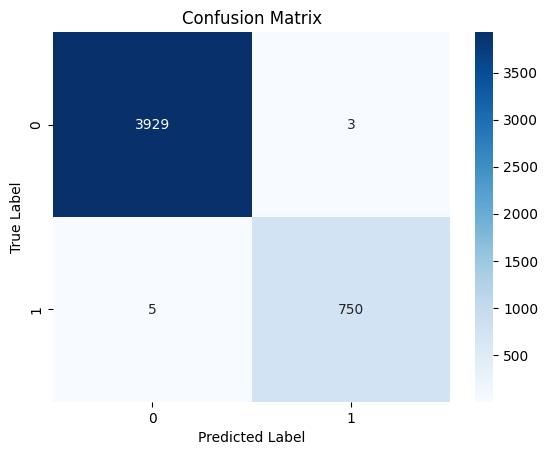

In [69]:
# Confusion Matrix
cm = confusion_matrix(y1, y_pred)
class_labels = np.unique(np.concatenate((y1, y_pred)))

# Create a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [70]:
from sklearn.metrics import classification_report

# Replace 'y_new_true' with the true labels of the new dataset
report = classification_report(y1, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3932
           1       1.00      0.99      0.99       755

    accuracy                           1.00      4687
   macro avg       1.00      1.00      1.00      4687
weighted avg       1.00      1.00      1.00      4687



achieving a perfect recall of 1 is challenging and often depends on the characteristics of the dataset and the problem being solved.

Here are some considerations:

    Perfectly Separable Classes:
        For a binary classification problem, perfect recall is more likely when the classes are perfectly separable. This means there is a clear boundary between the positive and negative instances, and the features provide distinct information about the class labels.

    Imbalanced Classes:
        In imbalanced datasets where one class significantly outnumbers the other, achieving high recall may be easier for the majority class, especially if the model predicts everything as the majority class. However, this comes at the cost of potentially low precision.

    Data Quality:
        The quality of the data and the representativeness of the dataset play a crucial role. If the dataset is noisy, incomplete, or unrepresentative of the real-world scenario, achieving perfect recall becomes more challenging.

    Model Complexity:
        The choice of the machine learning model and its complexity also influences recall. More complex models may have the capacity to capture intricate relationships in the data, potentially leading to higher recall.

    Thresholds and Trade-offs:
        Recall is often influenced by the choice of decision thresholds. Adjusting the threshold can impact the trade-off between precision and recall. In some cases, setting a low threshold may increase recall but decrease precision.

    Domain-Specific Factors:
        The nature of the problem and the domain-specific factors can affect the attainability of perfect recall. Some problems inherently allow for higher recall, while others may have inherent uncertainties.